In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from os import listdir, mkdir, getcwd
from os.path import isfile, join, basename, isdir

from sys import platform
if platform == "linux" or platform == "linux2":
    import ROOT
    %jsroot off

from analysis.convert_directory import convert_directory
from analysis.split_event_tree import split_event_tree,ttype_column
from analysis.calc import calc_nll

In [8]:
source_path = getcwd() # "/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH/"
output_path = join(source_path, ".npy")

convert_directory(source_path, "dataTree", output_path)

Skipping file <compare_out_jet.root> (exists)
Skipping file <compare_out_mcparticle.root> (exists)


In [9]:
files = list(map(lambda e: join(output_path, e), listdir(output_path)))
files

['/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/.npy/compare_out_jet.root.npy',
 '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/.npy/compare_out_mcparticle.root.npy',
 '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/.npy/output.e2e2qqh.root.npy',
 '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/.npy/output.e2e2qqh_v2.root.npy']

In [4]:
data_jet = pd.DataFrame(np.load(files[0], allow_pickle=True))
ttype_column(data_jet)
data_jet.columns

Index(['run', 'event', 'is_zhh', 'is_zzh', 'h1_decay_pdg', 'z2_decay_pdg',
       'zhh_sigma', 'zhh_sigmall', 'zhh_sigmalr', 'zhh_sigmarl', 'zhh_sigmarr',
       'zhh_mz', 'zhh_mhh', 'zhh_mzhh', 'zhh_phi', 'zhh_phif', 'zhh_phih',
       'zhh_costheta', 'zhh_costhetaf', 'zhh_costhetah', 'zhh_l1_e',
       'zhh_l1_px', 'zhh_l1_py', 'zhh_l1_pz', 'zhh_l2_e', 'zhh_l2_px',
       'zhh_l2_py', 'zhh_l2_pz', 'zhh_h1_e', 'zhh_h1_px', 'zhh_h1_py',
       'zhh_h1_pz', 'zhh_h2_e', 'zhh_h2_px', 'zhh_h2_py', 'zhh_h2_pz',
       'zzh_sigma', 'zzh_sigmalll', 'zzh_sigmallr', 'zzh_sigmalrl',
       'zzh_sigmalrr', 'zzh_sigmarrr', 'zzh_sigmarrl', 'zzh_sigmarlr',
       'zzh_sigmarll', 'zzh_mz1', 'zzh_mz2', 'zzh_mzz', 'zzh_mzzh', 'zzh_phi',
       'zzh_phiz', 'zzh_phiz1f', 'zzh_phiz2f', 'zzh_costheta', 'zzh_costhetaz',
       'zzh_costhetaz1f', 'zzh_costhetaz2f', 'zzh_l1_e', 'zzh_l1_px',
       'zzh_l1_py', 'zzh_l1_pz', 'zzh_l2_e', 'zzh_l2_px', 'zzh_l2_py',
       'zzh_l2_pz', 'zzh_z2f1_e', 'zzh_z2f1_px', 

In [10]:
data = pd.DataFrame(np.load(files[1], allow_pickle=True))
ttype_column(data)
data.columns

Index(['run', 'event', 'is_zhh', 'is_zzh', 'h1_decay_pdg', 'h2_decay_pdg',
       'z2_decay_pdg', 'zhh_sigma', 'zhh_sigmall', 'zhh_sigmalr',
       'zhh_sigmarl', 'zhh_sigmarr', 'zhh_mz', 'zhh_mhh', 'zhh_mzhh',
       'zhh_phi', 'zhh_phif', 'zhh_phih', 'zhh_costheta', 'zhh_costhetaf',
       'zhh_costhetah', 'zhh_l1_e', 'zhh_l1_px', 'zhh_l1_py', 'zhh_l1_pz',
       'zhh_l2_e', 'zhh_l2_px', 'zhh_l2_py', 'zhh_l2_pz', 'zhh_h1_e',
       'zhh_h1_px', 'zhh_h1_py', 'zhh_h1_pz', 'zhh_h2_e', 'zhh_h2_px',
       'zhh_h2_py', 'zhh_h2_pz', 'zzh_sigma', 'zzh_sigmalll', 'zzh_sigmallr',
       'zzh_sigmalrl', 'zzh_sigmalrr', 'zzh_sigmarrr', 'zzh_sigmarrl',
       'zzh_sigmarlr', 'zzh_sigmarll', 'zzh_sigmallz', 'zzh_sigmalrz',
       'zzh_sigmarrz', 'zzh_sigmarlz', 'zzh_mz1', 'zzh_mz2', 'zzh_mzz',
       'zzh_mzzh', 'zzh_mh', 'zzh_phi', 'zzh_phiz', 'zzh_phiz1f', 'zzh_phiz2f',
       'zzh_costheta', 'zzh_costhetaz', 'zzh_costhetaz1f', 'zzh_costhetaz2f',
       'zzh_l1_e', 'zzh_l1_px', 'zzh_l1_py', 'zz

<Axes: xlabel='h1_decay_pdg', ylabel='count'>

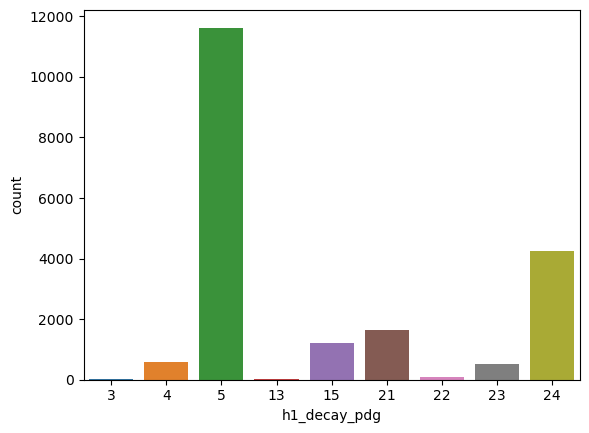

In [11]:
sns.countplot(data[data["is_zhh"] == 1], x="h1_decay_pdg")

<Axes: xlabel='h2_decay_pdg', ylabel='count'>

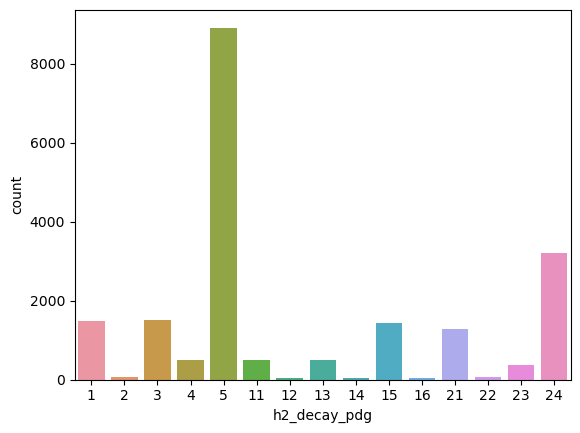

In [12]:
sns.countplot(data[data["is_zhh"] == 1], x="h2_decay_pdg")

<Axes: xlabel='z2_decay_pdg', ylabel='count'>

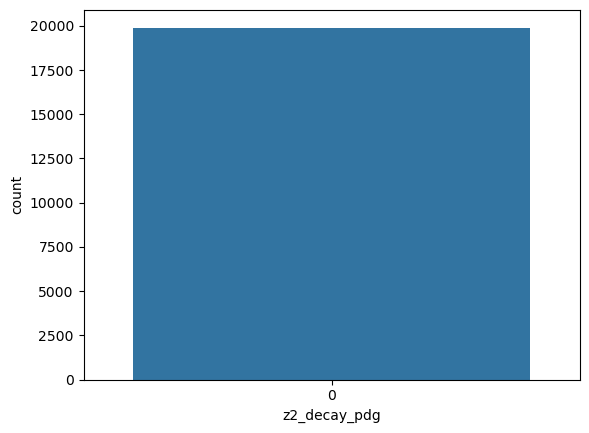

In [13]:
sns.countplot(data[data["is_zzh"] == 1], x="z2_decay_pdg")

In [14]:
def calc_nll(df, zhh_me = "zhh_sigma", zzh_me = "zzh_sigma"):
    df["zhh_nll"] = -np.log(df[zhh_me])
    df["zzh_nll"] = -np.log(df[zzh_me])
    df["llr"]     = np.log(df[zzh_me]/df[zhh_me])
    df.reset_index(drop=True, inplace=True)
    
    return df

In [15]:
# For total ME, sum over helicity final states (for Z boson with spin s=1, 2s+1=3 possibilities, s_z = -1,0,1), average over helicity initial states (RL, LR)
# Here, however, we just want to summarize the 
data["zzh_sigmalr"] = 1/3 * ( data["zzh_sigmalrl"] + data["zzh_sigmalrz"] + data["zzh_sigmalrr"] )

In [16]:
data[["zhh_sigmalr", "zzh_sigmalr"]]

,zhh_sigmalr,zzh_sigmalr
0,2.304830e-18,7.257657e-15
1,1.854236e-19,3.986384e-17
2,1.684904e-17,2.158590e-14
3,2.304636e-18,6.821979e-16
4,1.554785e-17,9.529297e-18
...,...,...
39795,3.888829e-09,8.330220e-18
39796,4.757315e-09,4.143008e-17
39797,1.068449e-08,1.926371e-17
39798,1.217873e-08,1.130234e-17


<Axes: xlabel='zhh_costhetaf', ylabel='Count'>

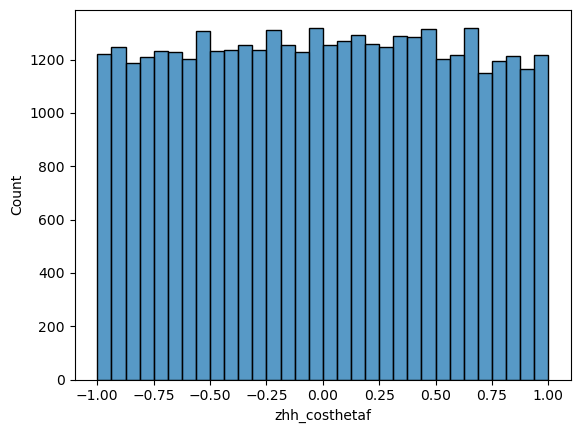

In [58]:
sns.histplot(data["zhh_costhetaf"], bins=32)

<Axes: xlabel='zzh_costhetaz', ylabel='Count'>

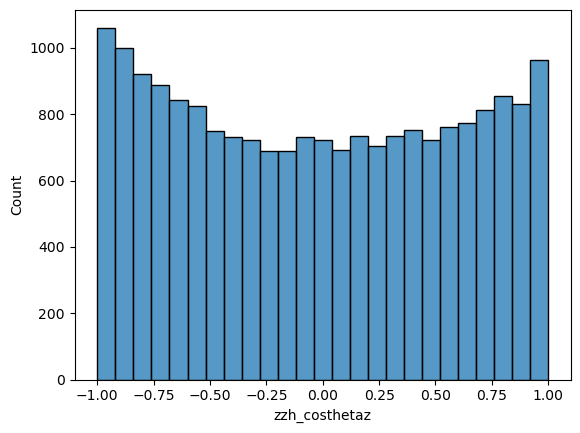

In [41]:
sns.histplot(data["zzh_costhetaz"])

In [18]:
true_zzh = data[(data["is_zzh"] == 1) & (data["zhh_sigma"] > 0) & (data["zzh_sigma"] > 0)].copy()
true_zhh = data[(data["is_zhh"] == 1) & (data["zhh_sigma"] > 0) & (data["zzh_sigma"] > 0)].copy()

In [19]:
true_zzh = calc_nll(true_zzh, "zhh_sigmalr", "zzh_sigmalr")
true_zhh = calc_nll(true_zhh, "zhh_sigmalr", "zzh_sigmalr")

In [301]:
def plot_hist(zhh_nll, zzh_nll, xlabel="nll", units="", normalize=False, y1name = "ZHH MCTruth (Red)", y2name = "ZZH MCTruth (Blue)", title="Likelihood-Analysis"):
    g_min = 0.98*min(zhh_nll.min(), zzh_nll.min())
    g_max = 1.02*max(zhh_nll.max(), zzh_nll.max())
    
    canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
    
    hist_zhh = ROOT.TH1D(y1name, title, 128, g_min, g_max)
    hist_zzh = ROOT.TH1D(y2name, "", 128, g_min, g_max)

    xaxis = hist_zhh.GetXaxis()
    xaxis.SetTitle(xlabel + (" [" + units + "]" if units != "" else ""))
    
    ROOT.gStyle.SetErrorX(0)

    # Assume hist_zhh and hist_zzh are of same size
    for i in range(0, len(zhh_nll)):
        hist_zhh.Fill(zhh_nll[i])
        hist_zzh.Fill(zzh_nll[i])
    
    maxval = max(
        hist_zhh.GetMaximum(),
        hist_zzh.GetMaximum()
    )
    
    if normalize: 
        maxval = max(
            hist_zhh.GetMaximum()/hist_zhh.Integral(),
            hist_zzh.GetMaximum()/hist_zzh.Integral()
        )

        hist_zhh.Scale(1/hist_zhh.Integral())
        hist_zzh.Scale(1/hist_zzh.Integral())
        
    hist_zhh.SetAxisRange(0., 1.02*maxval, "Y");

    hist_zhh.SetFillStyle(3004)
    hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
    hist_zhh.SetLineWidth(2)
    hist_zhh.SetLineColor(ROOT.kRed)

    hist_zzh.SetFillStyle(3004)
    hist_zzh.SetFillColorAlpha(ROOT.kBlue, 0.35)
    hist_zzh.SetLineColor(ROOT.kBlue)
    hist_zzh.SetLineWidth(2)
    
    hist_zhh.Draw("HIST")
    hist_zzh.Draw("HISTSAMES")
    
    canv.Draw()
    
    ROOT.gPad.Update()

    # Adjust statsbox; possible only after drawing
    # See https://root.cern.ch/doc/master/classTPaveStats.html
    statsbox_zhh = hist_zhh.FindObject("stats")
    statsbox_zhh.SetX1NDC(0.7)
    statsbox_zhh.SetX2NDC(0.95)
    statsbox_zhh.SetY1NDC(0.75)
    statsbox_zhh.SetY2NDC(0.88)

    #lol = statsbox_zhh.GetListOfLines()
    #ttxt = statsbox_zhh.GetLineWith("Entries")
    #ttxt.SetTextColor(ROOT.kRed)
    #lol.Remove(ttxt)

    statsbox_zzh = hist_zzh.FindObject("stats")
    hist_zzh.GetListOfFunctions().Remove(statsbox_zzh)
    hist_zzh.SetStats(0)
    
    statsbox_zzh.SetAllWith("", "Color", ROOT.kBlue)
    statsbox_zzh.SetX1NDC(0.7)
    statsbox_zzh.SetX2NDC(0.95)
    statsbox_zzh.SetY1NDC(0.6)
    statsbox_zzh.SetY2NDC(0.73)
    statsbox_zzh.GetLineWith("Entries").SetTextColor(ROOT.kBlue)
    statsbox_zzh.SetLineColor(ROOT.kBlue)
    
    statsbox_zzh.Draw()

    canv.Modified()
    canv.Update()

    return [canv, hist_zzh, hist_zhh]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH MCTruth (Red) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH MCTruth (Blue) (Potential memory leak).


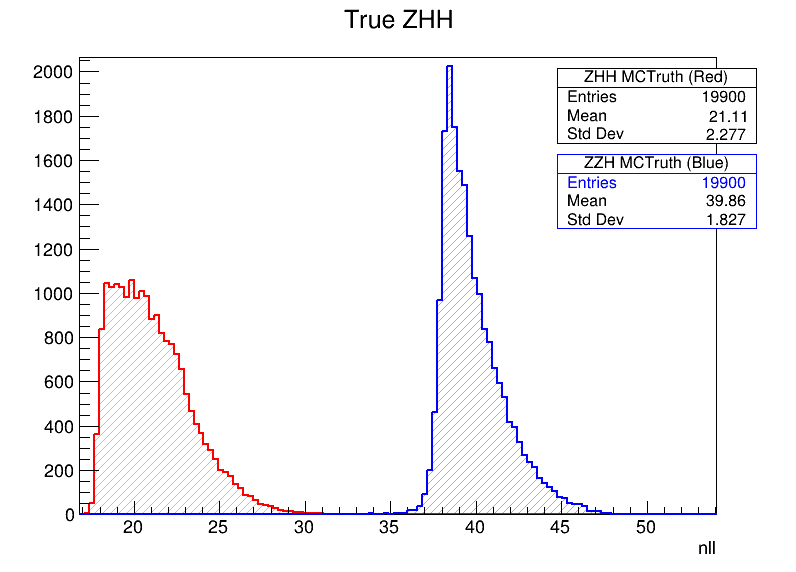

In [302]:
plot_hist(true_zhh["zhh_nll"], true_zhh["zzh_nll"], title="True ZHH")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH MCTruth (Red) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH MCTruth (Blue) (Potential memory leak).


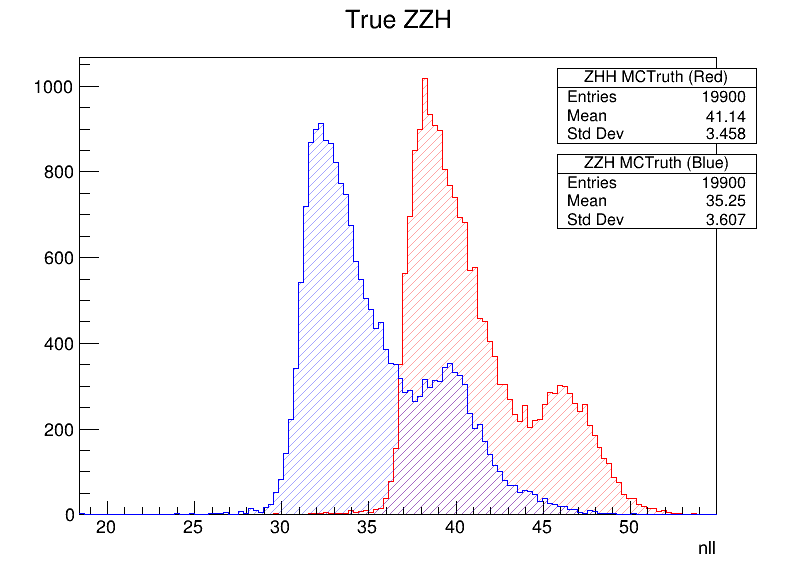

In [70]:
plot_hist(true_zzh["zhh_nll"], true_zzh["zzh_nll"], title="True ZZH")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH MCTruth (Red) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH MCTruth (Blue) (Potential memory leak).


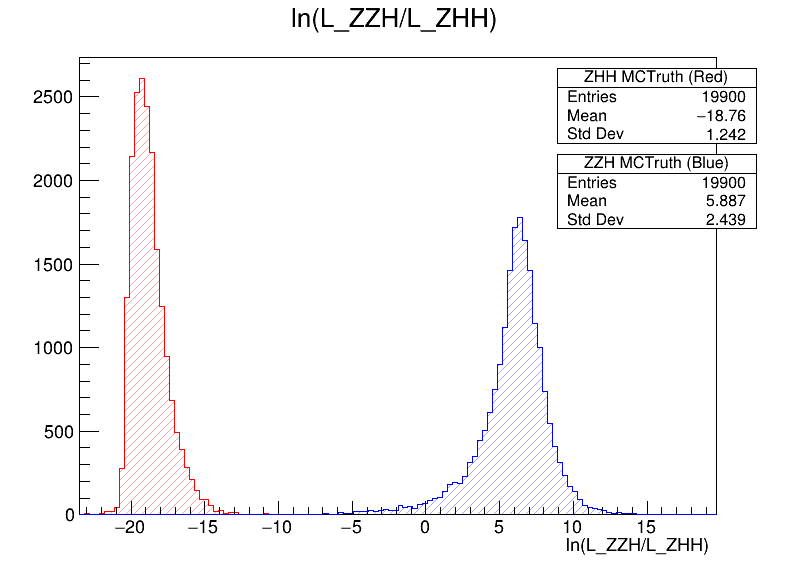

In [71]:
plot_hist(true_zhh["llr"], true_zzh["llr"], title="ln(L_ZZH/L_ZHH)", xlabel="ln(L_ZZH/L_ZHH)")

<Axes: xlabel='zhh_costhetah', ylabel='Count'>

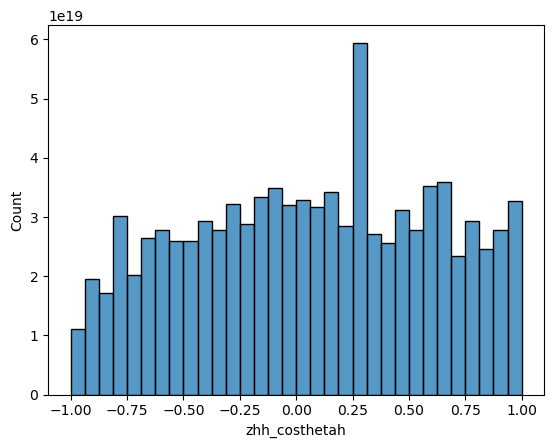

In [56]:
sns.histplot(x=data2["zhh_costhetah"], bins=32, weights=np.array(1/data2["zhh_sigma"]))

<Axes: xlabel='zzh_costheta', ylabel='zzh_sigma'>

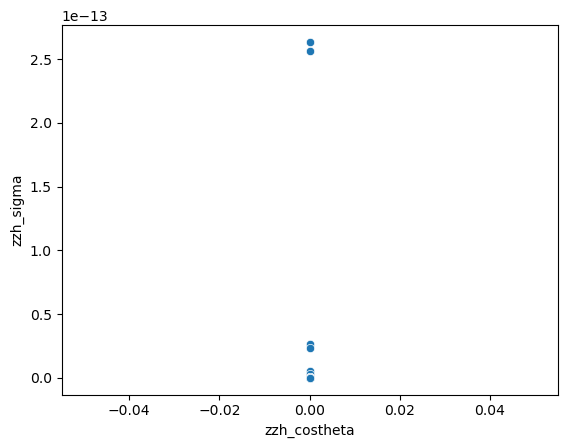

In [71]:
sns.scatterplot(x=data2["zzh_costheta"], y=data2["zzh_sigma"])

<Axes: xlabel='zzh_costhetaz2f', ylabel='Count'>

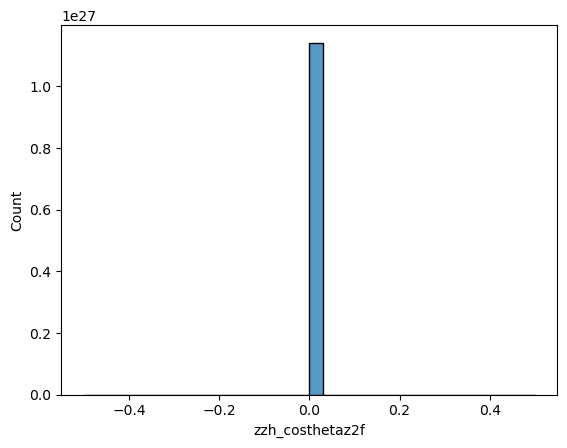

In [63]:
sns.histplot(x=data2["zzh_costhetaz2f"], bins=32, weights=np.array(1/data2["zzh_sigma"]))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH MCTruth (Red) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH MCTruth (Blue) (Potential memory leak).


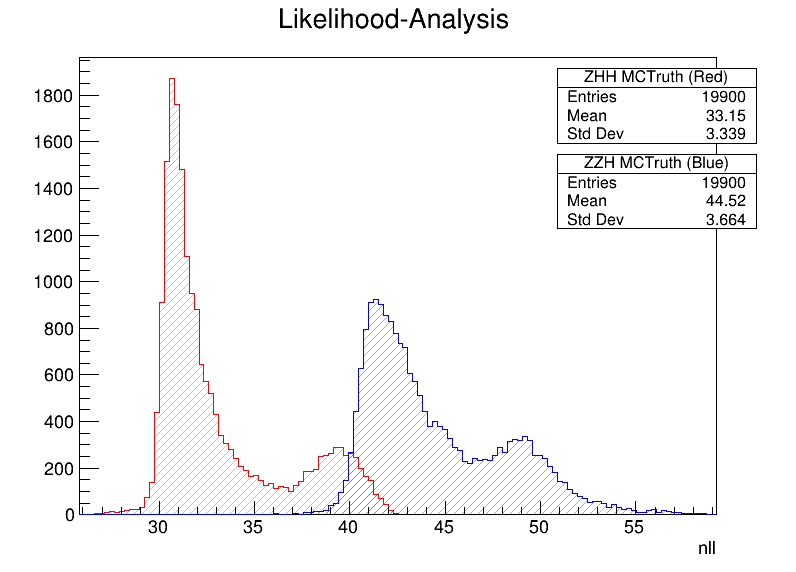

In [50]:
calc_nll(data2)
plot_nll(data2["zhh_nll"], data2["zzh_nll"])

In [9]:
data["h1z2_decay_pdg"] = data["h1_decay_pdg"] + data["z2_decay_pdg"]

Text(0.5, 1.0, 'MCParticle data')

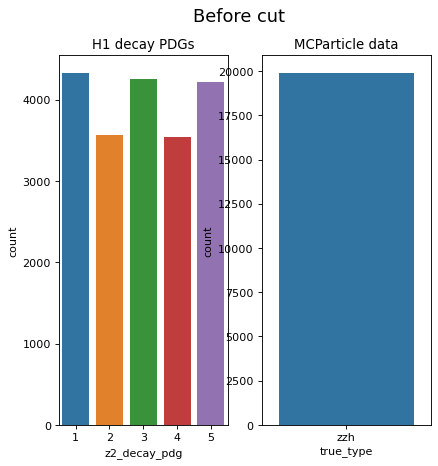

In [14]:
d = data
fig, axes = plt.subplots(1,2, figsize=(6, 6), dpi=80)
fig.suptitle("Before cut", fontsize=16)

ax = sns.countplot(d, x="z2_decay_pdg", ax=axes[0])
ax.set_title("H1 decay PDGs")

ax = sns.countplot(d, x="true_type", ax=axes[1])
ax.set_title("MCParticle data")

Important: Unaccounted/"thrown away" events: H->gg,gammagamma,ZZ,W+W-

In [12]:
# Show amount of thrown-away entries
selection = data[(data["zhh_sigma"] <= 0) | (data["zzh_sigma"] <= 0)]
print("Throwing away", len(selection)/len(data)*100, "% of all events")

Throwing away 16.28391959798995 % of all events


In [14]:
# Applying cut
data_cut = data.loc[(data["zhh_sigma"] > 0) & (data["zzh_sigma"] > 0)].copy()
data_cut.shape

data_jet_cut = data_jet.loc[(data_jet["zhh_sigma"] > 0) & (data_jet["zzh_sigma"] > 0)].copy()
data_jet_cut.shape

(6276, 78)

In [42]:
data_cut["zhh_nll"] = -np.log(data_cut["zhh_sigma"])
data_cut["zzh_nll"] = -np.log(data_cut["zzh_sigma"])
data_cut["llr"]     = np.log(data_cut["zzh_sigma"]/data_cut["zhh_sigma"])
data_cut.reset_index(drop=True, inplace=True)

data_jet_cut["zhh_nll"] = -np.log(data_jet_cut["zhh_sigma"])
data_jet_cut["zzh_nll"] = -np.log(data_jet_cut["zzh_sigma"])
data_jet_cut["llr"]     = np.log(data_jet_cut["zzh_sigma"]/data_jet_cut["zhh_sigma"])
data_jet_cut.reset_index(drop=True, inplace=True)

Text(0.5, 0, 'ln(L_0/L_1)')

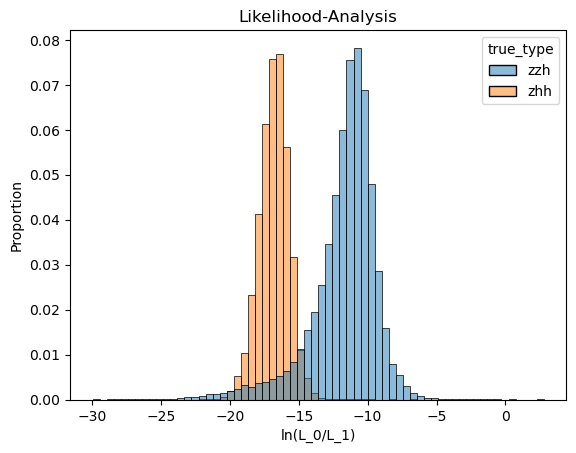

In [16]:
ax = sns.histplot(data_cut, x="llr", hue="true_type", bins=64, stat="proportion")
ax.set_title("Likelihood-Analysis")
ax.set_xlabel("ln(L_0/L_1)")

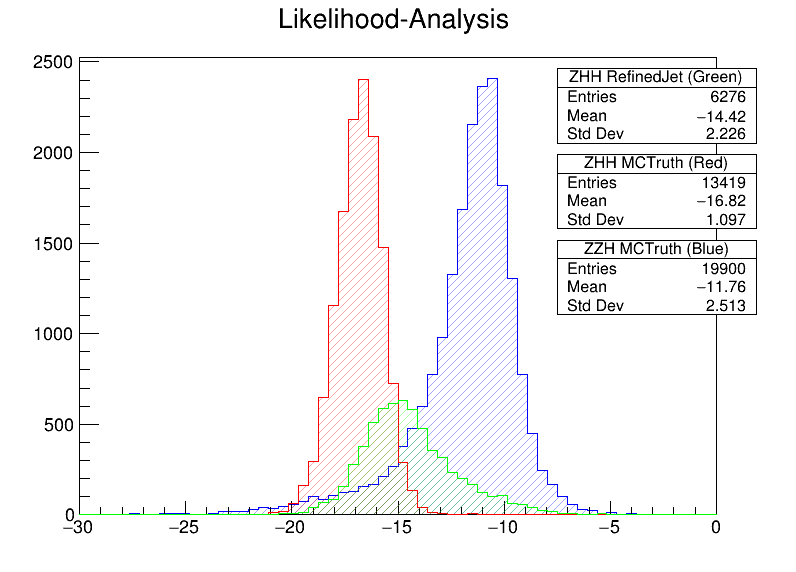

In [14]:
canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
hist_zzh = ROOT.TH1D("ZZH MCTruth (Blue)", "Likelihood-Analysis", 64, -30, 0)
hist_zhh = ROOT.TH1D("ZHH MCTruth (Red)", "Likelihood-Analysis", 64, -30, 0)
hist_zhh_jet = ROOT.TH1D("ZHH RefinedJet (Green)", "Likelihood-Analysis", 64, -30, 0)

llr = data_cut["llr"]
ttype = data_cut["true_type"]
for i in range(0, len(llr)):
    if ttype[i] == "zzh":
        hist_zzh.Fill(llr[i])
    elif ttype[i] == "zhh":
        hist_zhh.Fill(llr[i])

llr = data_jet_cut["llr"]
ttype = data_jet_cut["true_type"]
for i in range(0, len(llr)):
    hist_zhh_jet.Fill(llr[i])

hist_zzh.SetFillStyle(3004)
hist_zzh.SetFillColorAlpha(ROOT.kBlue, 0.35)
hist_zzh.SetLineColor(ROOT.kBlue)

hist_zhh.SetFillStyle(3004)
hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
hist_zhh.SetLineColor(ROOT.kRed)

hist_zhh_jet.SetFillStyle(3004)
hist_zhh_jet.SetFillColorAlpha(ROOT.kGreen, 0.35)
hist_zhh_jet.SetLineColor(ROOT.kGreen)

hist_zzh.Draw()
hist_zhh.Draw("sames")
hist_zhh_jet.Draw("sames")
canv.Draw()

ROOT.gPad.Update()

# Adjust statsbox; possible only after drawing
# See https://root.cern.ch/doc/master/classTPaveStats.html
statsbox_zhh_jet = hist_zhh_jet.FindObject("stats")
statsbox_zhh_jet.SetX1NDC(0.7)
statsbox_zhh_jet.SetX2NDC(0.95)
statsbox_zhh_jet.SetY1NDC(0.75)
statsbox_zhh_jet.SetY2NDC(0.88)

statsbox_zhh = hist_zhh.FindObject("stats")
statsbox_zhh.SetX1NDC(0.7)
statsbox_zhh.SetX2NDC(0.95)
statsbox_zhh.SetY1NDC(0.6)
statsbox_zhh.SetY2NDC(0.73)

statsbox_zzh = hist_zzh.FindObject("stats")
statsbox_zhh.GetListOfLines()[1].SetTextColor(ROOT.kRed)
statsbox_zzh.SetX1NDC(0.7)
statsbox_zzh.SetX2NDC(0.95)
statsbox_zzh.SetY1NDC(0.45)
statsbox_zzh.SetY2NDC(0.58)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH (Red) (Potential memory leak).


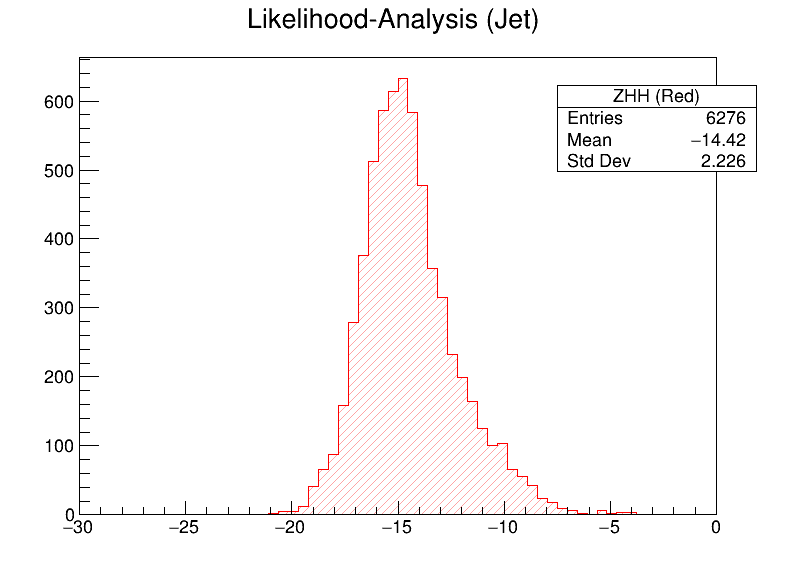

In [102]:
canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
hist_zhh = ROOT.TH1D("ZHH (Red)", "Likelihood-Analysis (Jet)", 64, -30, 0)

llr = data_cut["llr"]
ttype = data_cut["true_type"]
for i in range(0, len(llr)):
    if ttype[i] == "zhh":
        hist_zhh.Fill(llr[i])

hist_zhh.SetFillStyle(3004)
hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
hist_zhh.SetLineColor(ROOT.kRed)

hist_zhh.Draw()
canv.Draw()

ROOT.gPad.Update()

# Adjust statsbox; possible only after drawing
# See https://root.cern.ch/doc/master/classTPaveStats.html
statsbox_zhh = hist_zhh.FindObject("stats")
statsbox_zhh.SetX1NDC(0.7)
statsbox_zhh.SetX2NDC(0.95)
statsbox_zhh.SetY1NDC(0.7)
statsbox_zhh.SetY2NDC(0.85)

In [ ]:
canv = ROOT.TCanvas("c_name", "c_title", 800, 600)
hist_zzh = ROOT.TH1D("ZZH (Blue)", "Likelihood-Analysis (MCParticle)", 64, -30, 0)
hist_zhh = ROOT.TH1D("ZHH (Red)", "Likelihood-Analysis", 64, -30, 0)

llr = data_cut["llr"]
ttype = data_cut["true_type"]
for i in range(0, len(llr)):
    if ttype[i] == "zzh":
        hist_zzh.Fill(llr[i])
    elif ttype[i] == "zhh":
        hist_zhh.Fill(llr[i])

hist_zzh.SetFillStyle(3004)
hist_zzh.SetFillColorAlpha(ROOT.kBlue, 0.35)
hist_zzh.SetLineColor(ROOT.kBlue)

hist_zhh.SetFillStyle(3004)
hist_zhh.SetFillColorAlpha(ROOT.kRed, 0.35)
hist_zhh.SetLineColor(ROOT.kRed)

hist_zzh.Draw()
hist_zhh.Draw("sames")
canv.Draw()

ROOT.gPad.Update()

# Adjust statsbox; possible only after drawing
# See https://root.cern.ch/doc/master/classTPaveStats.html
statsbox_zhh = hist_zhh.FindObject("stats")
statsbox_zhh.SetX1NDC(0.7)
statsbox_zhh.SetX2NDC(0.95)
statsbox_zhh.SetY1NDC(0.7)
statsbox_zhh.SetY2NDC(0.85)

statsbox_zzh = hist_zzh.FindObject("stats")
statsbox_zhh.GetListOfLines()[1].SetTextColor(ROOT.kRed)
statsbox_zzh.SetX1NDC(0.7)
statsbox_zzh.SetX2NDC(0.95)
statsbox_zzh.SetY1NDC(0.5)
statsbox_zzh.SetY2NDC(0.65)

Text(0.5, 1.0, 'ZHH vs ZZH LR')

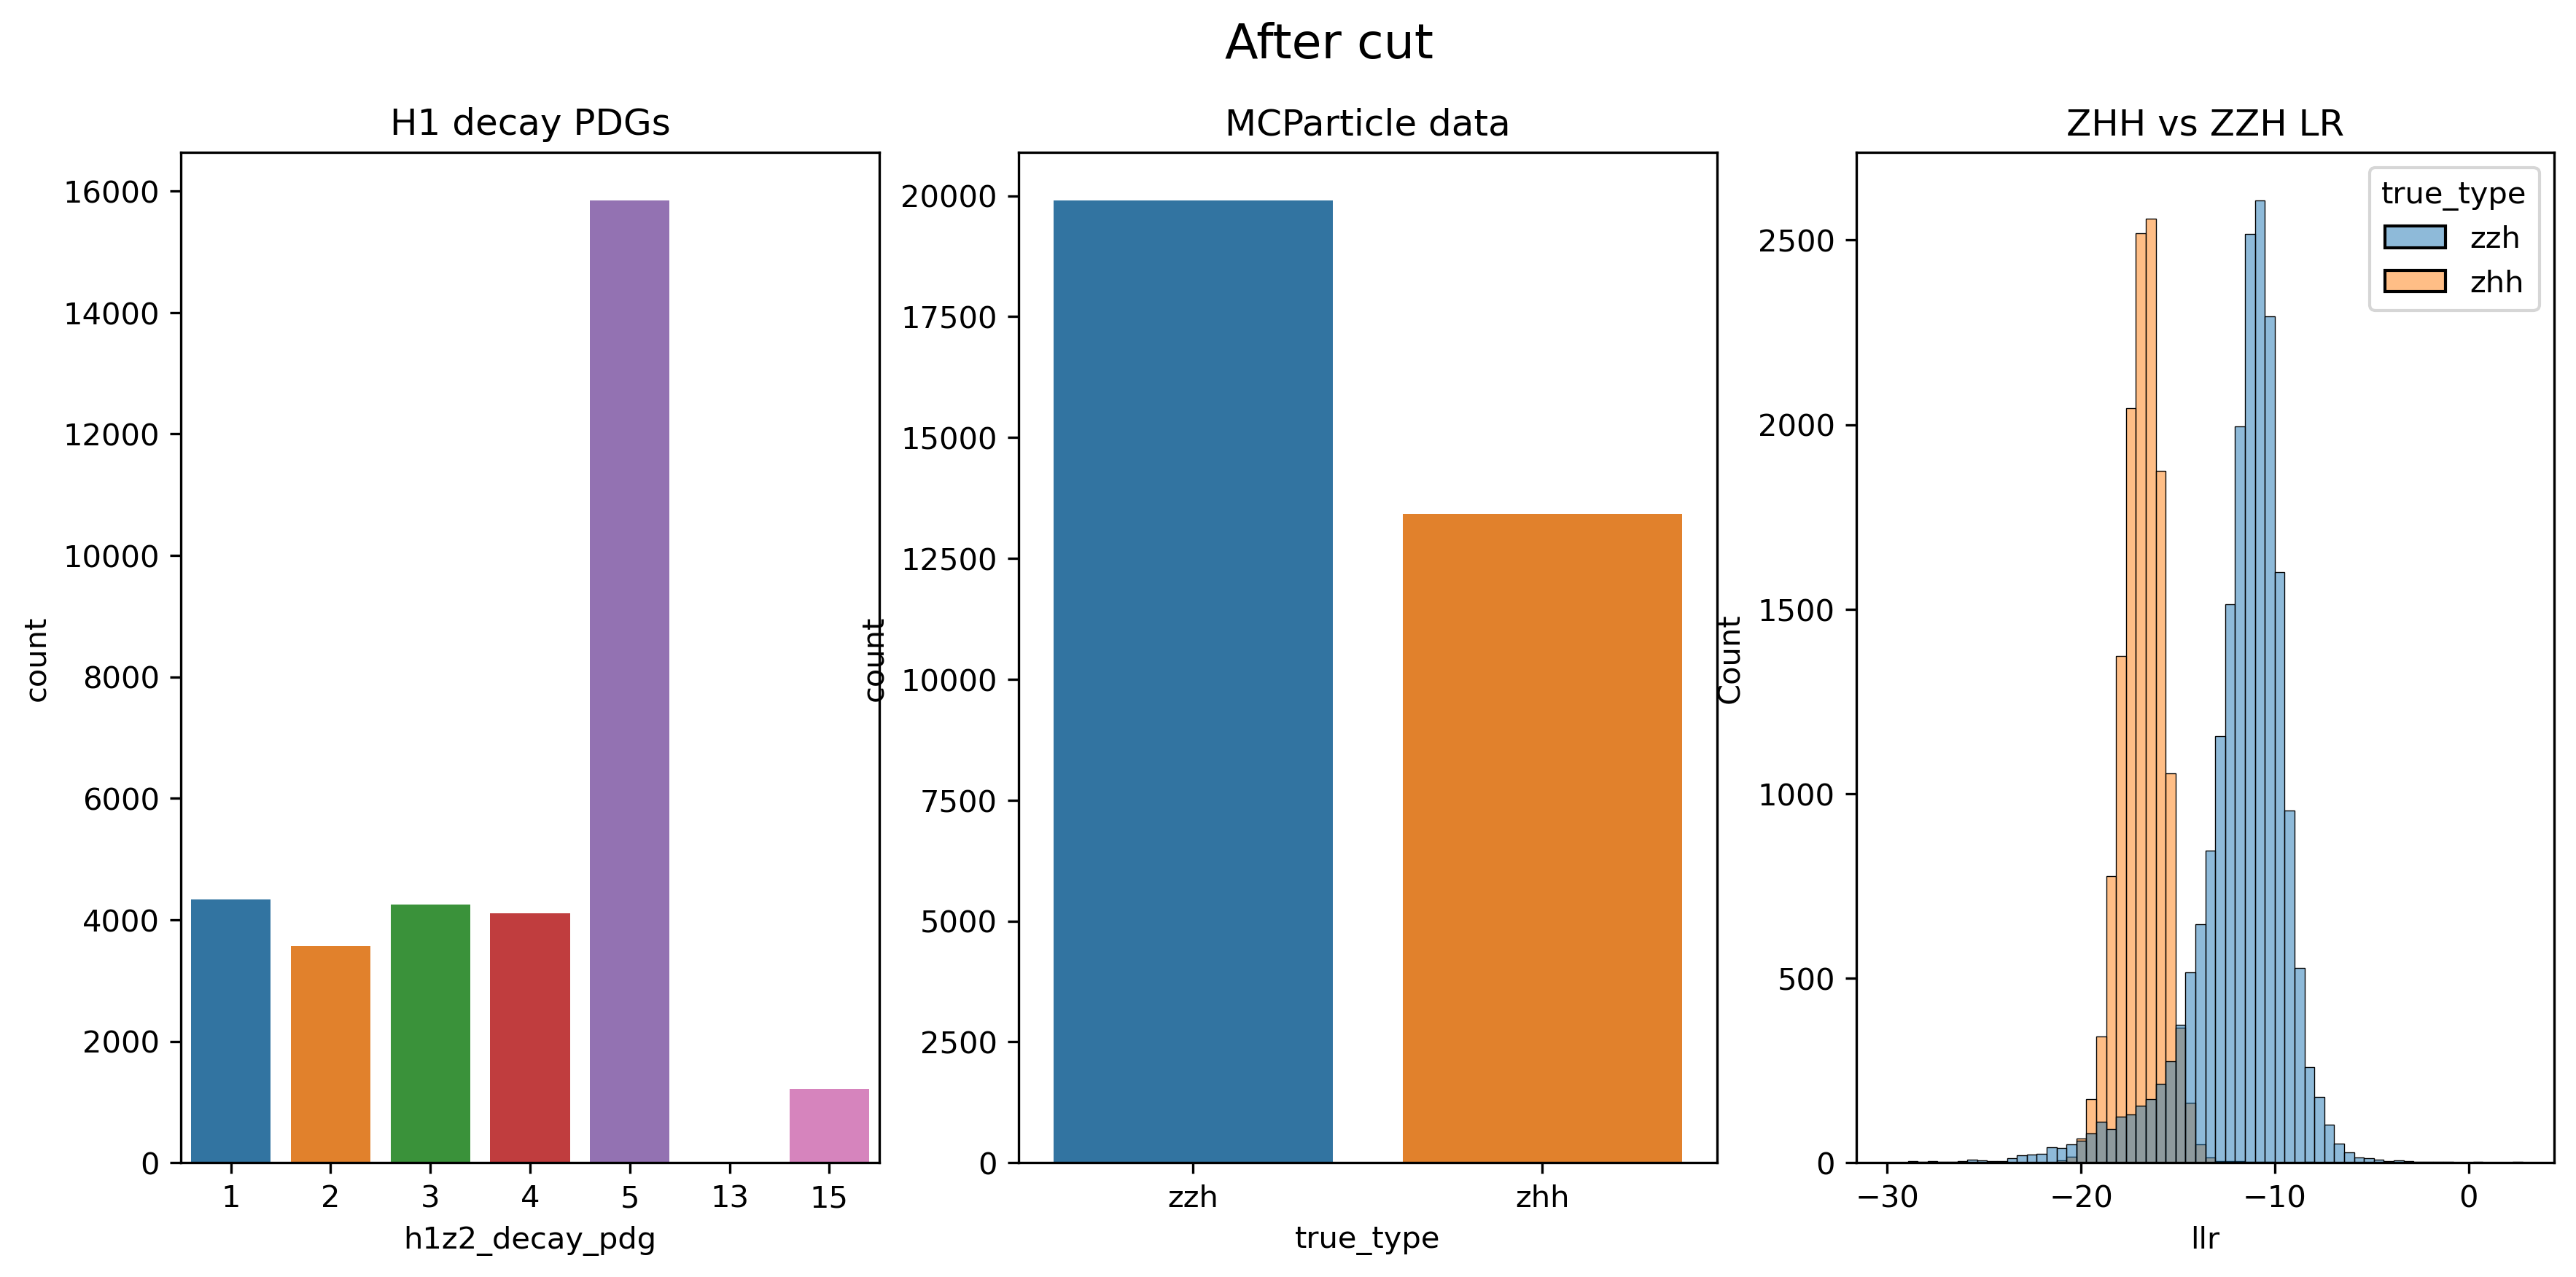

In [17]:
d = data_cut
fig, axes = plt.subplots(1,3, figsize=(14, 6), dpi=300)
fig.suptitle("After cut", fontsize=16)

ax = sns.countplot(d, x="h1z2_decay_pdg", ax=axes[0])
ax.set_title("H1 decay PDGs")

ax = sns.countplot(d, x="true_type", ax=axes[1])
ax.set_title("MCParticle data")

ax = sns.histplot(d, x="llr", hue="true_type", bins=64, ax=axes[2])
ax.set_title("ZHH vs ZZH LR")

In [14]:
true_zhh = data_cut[data_cut["is_zhh"] == 1]
true_zzh = data_cut[data_cut["is_zzh"] == 1]

In [15]:
print(true_zhh.shape[0], true_zzh.shape[0])

13419 19900


In [20]:
true_zhh_split = split_event_tree(true_zhh)
true_zzh_split = split_event_tree(true_zzh)

Text(0.5, 1.0, 'True ZHH MCParticles')

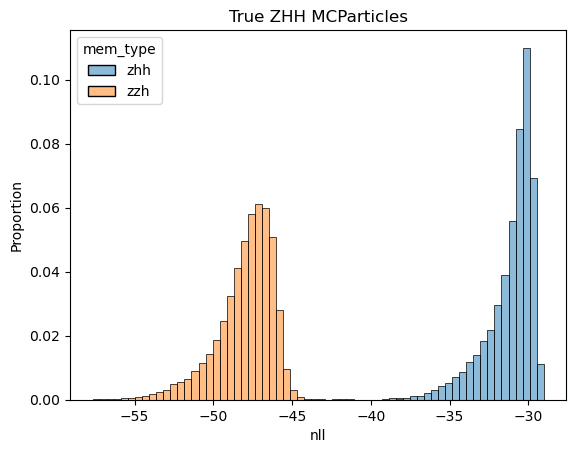

In [124]:
ax = sns.histplot(true_zhh_split, x="nll", hue="mem_type", bins=64, stat="proportion")
ax.set_title("True ZHH MCParticles")

In [128]:
true_zzh_split.reset_index(drop=True, inplace=True)
true_zzh_split

,run,event,is_zhh,is_zzh,h1_decay_pdg,z2_decay_pdg,sigma,zhh_sigmall,zhh_sigmalr,zhh_sigmarl,...,zzh_z2f2_pz,zzh_h_e,zzh_h_px,zzh_h_py,zzh_h_pz,true_type,h1z2_decay_pdg,nll,llr,mem_type
0,403011,1,0,1,0.0,3.0,7.344602e-14,6.965651e-14,3.789516e-15,3.805584e-15,...,124.031075,157.041733,72.794846,-53.599247,-29.413172,zzh,3,-30.242226,-12.641044,zhh
1,403011,2,0,1,0.0,3.0,4.030331e-15,3.575435e-15,4.548957e-16,4.571881e-16,...,11.577676,207.198273,-61.250061,-57.741375,142.198761,zzh,3,-33.144928,-13.411046,zhh
2,403011,3,0,1,0.0,4.0,5.704280e-14,2.816861e-14,2.887418e-14,2.887788e-14,...,0.089793,131.937668,35.247631,13.085950,19.206999,zzh,4,-30.494975,-9.337396,zhh
3,403011,4,0,1,0.0,4.0,5.946260e-15,1.461537e-15,4.484724e-15,4.473190e-15,...,-30.268082,220.370789,23.868135,-177.702896,-28.111895,zzh,4,-32.756014,-11.228584,zhh
4,403011,5,0,1,0.0,5.0,1.256231e-14,1.136108e-14,1.201230e-15,1.202365e-15,...,61.523773,139.716232,12.830882,56.313324,-23.660160,zzh,5,-32.008075,-16.234907,zhh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39795,403011,19896,0,1,NaN,NaN,2.275090e-18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,5,-40.624512,-10.832258,zzh
39796,403011,19897,0,1,NaN,NaN,6.323993e-20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,1,-44.207351,-11.126942,zzh
39797,403011,19898,0,1,NaN,NaN,2.782756e-22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,2,-49.633430,-10.867312,zzh
39798,403011,19899,0,1,NaN,NaN,6.431234e-19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,zzh,2,-41.887950,-11.220890,zzh


Text(0.5, 1.0, 'True ZZH MCParticles')

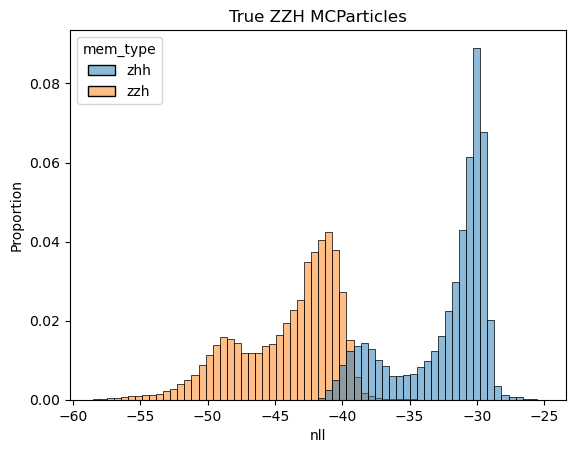

In [129]:
ax = sns.histplot(true_zzh_split, x="nll", hue="mem_type", bins=64, stat="proportion")
ax.set_title("True ZZH MCParticles")